# Phishing URL Detection 

The Internet has become an indispensable part of
our life, However, It also has provided opportunities to anonymously perform malicious activities like Phishing. Phishers try to deceive their victims by social engineering or creating mockup websites to steal information such as account ID, username, password from individuals and organizations. Although many methods have been proposed to detect phishing websites, Phishers have evolved their methods to escape from these detection methods. One of the most successful methods for detecting these malicious activities is Machine Learning. This is because most Phishing attacks have some common characteristics which can be identified by machine learning methods.

The steps demonstrated in this notebook are:

1. Loading the data
2. Familiarizing with data & EDA
3. Visualizing the data
4. Splitting the data
5. Training the data
6. Comparision of Model
7. Conclusion

## 1. Loading Data:

In [2]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')
#Loading data into dataframe
legitimate_df = pd.read_csv("legitimate_websites.csv")
phishing_df = pd.read_csv("phishing_websites.csv")
df = pd.concat([legitimate_df, phishing_df], axis=0)
df = df.sample(frac=1)
df = df.drop(['Hppts'], axis=1)
df = df.drop(['URL'], axis=1)
df.head()

,has_title,has_submit,has_link,has_email_input,number_of_inputs,number_of_buttons,number_of_images,number_of_option,number_of_list,number_of_href,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,label
9153,1,0,1,0,0,0,2,0,5,3,...,0,1,0,0,0,0,1,0,1,1
5968,1,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,1
8768,1,0,0,0,0,3,2,0,1,0,...,0,0,0,0,0,0,1,1,1,1
5459,1,0,0,0,1,0,1,0,0,1,...,0,1,0,0,0,0,1,1,1,0
4627,1,0,1,1,4,2,1,0,0,3,...,0,1,0,0,0,0,0,0,1,1


In [3]:
# List of desired features
desired_features = [
    'length_of_text', 'prefixSuffix', 'number_of_hidden_element', 'number_of_meta', 'number_of_div', 'length_of_title', 'WebsiteForwarding', 'number_of_script', 'number_of_span', 'number_of_a', 'longUrl', 'has_h1', 'SubDomains', 'number_of_images', 'number_of_list', 'has_iframe', 'has_link','label'
]

# Load data into DataFrame
legitimate_df = pd.read_csv("legitimate_websites.csv")
phishing_df = pd.read_csv("phishing_websites.csv")
df = pd.concat([legitimate_df, phishing_df], axis=0)
df = df.sample(frac=1)

# Drop unnecessary columns
df = df.drop(['Hppts', 'URL'], axis=1)

# Keep only the desired features
df = df[desired_features]

# Display the first few rows of the DataFrame
df.head()


,length_of_text,prefixSuffix,number_of_hidden_element,number_of_meta,number_of_div,length_of_title,WebsiteForwarding,number_of_script,number_of_span,number_of_a,longUrl,has_h1,SubDomains,number_of_images,number_of_list,has_iframe,has_link,label
503,6585,0,180,16,615,44,1,51,79,274,0,1,0,71,12,1,1,0
7168,823,0,298,16,297,65,1,35,8,32,0,1,0,17,0,0,1,0
6128,17536,0,271,30,2011,28,1,70,832,205,0,0,0,216,116,1,1,0
2194,212,0,36,4,34,9,1,2,2,5,0,1,0,2,1,0,0,1
1358,11730,0,224,16,595,55,1,49,71,61,0,1,0,49,24,1,1,0


## 2. Familiarizing with Data & EDA:
In this step, few dataframe methods are used to look into the data and its features.

In [3]:
df.shape

(20226, 74)

In [4]:
#description of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
has_title,20226.0,0.923564,0.265701,0.0,1.0,1.0,1.0,1.0
has_submit,20226.0,0.104371,0.305748,0.0,0.0,0.0,0.0,1.0
has_link,20226.0,0.701276,0.457710,0.0,0.0,1.0,1.0,1.0
has_email_input,20226.0,0.082122,0.274557,0.0,0.0,0.0,0.0,1.0
number_of_inputs,20226.0,4.584297,40.755906,0.0,0.0,0.0,2.0,2382.0
...,...,...,...,...,...,...,...,...
PageRank,20226.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
GoogleIndex,20226.0,0.991941,0.089411,0.0,1.0,1.0,1.0,1.0
LinksPointingToPage,20226.0,0.425294,0.494400,0.0,0.0,0.0,1.0,1.0
StatsReport,20226.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


## 3. Visualizing the data:
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

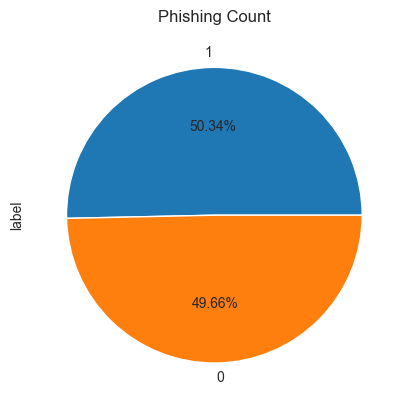

In [5]:
# Phishing Count in pie chart

df['label'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

## 4. Splitting the Data:
The data is split into train & test sets, 80-20 split.

In [7]:
# Splitting the dataset into dependant and independant fetature

X = df.drop(["label"],axis =1)
y = df["label"]

In [8]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16180, 73), (16180,), (4046, 73), (4046,))

## 5. Model Building & Training:

1. k-Nearest Neighbors 
2. Decision Tree
3. Random Forest
4. Gradient Boosting
5. Catboost
6. Xgboost

              
  The metrics considered to evaluate the model performance are Accuracy & F1 score.

In [21]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []
prediction_time = []

#function to call for storing the results
def storeResults(model, a,b,c,d, pred_time):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))
  prediction_time.append(round(pred_time, 3))

## 5.1. K-Nearest Neighbors : Classifier

Cross Validation:

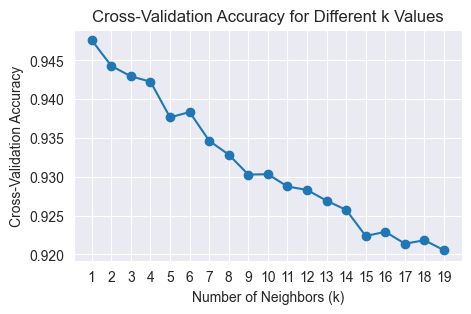

Best n_neighbors Value: 1
Average Accuracy: 0.9475922930795238


In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Initialize the scaler and scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define n_neighbors range
k_values = range(1, 20)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Perform 5-fold cross-validation with scaled data
    scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')
    cv_scores.append(np.mean(scores))

# Plotting the cross-validation scores for each k
plt.figure(figsize=(5, 3))
plt.plot(k_values, cv_scores, marker='o', linestyle='-')
plt.title('Cross-Validation Accuracy for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find Best n_neighbors Value:
best_k = k_values[np.argmax(cv_scores)]
print(f"Best n_neighbors Value: {best_k}")
print(f"Average Accuracy: {max(cv_scores)}")


Train the best Model:

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import time

# Assuming X_train and X_test are your feature matrices
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the KNN model
knn = KNeighborsClassifier(n_neighbors=1)

# Fit the model using the scaled data
start_train = time.time()
knn.fit(X_train_scaled, y_train)
end_train = time.time()
train_time = end_train - start_train

# Measure prediction time for training data
start_predict_train = time.time()
y_train_knn = knn.predict(X_train_scaled)
end_predict_train = time.time()
predict_train_time = end_predict_train - start_predict_train

# Measure prediction time for test data
start_predict_test = time.time()
y_test_knn = knn.predict(X_test_scaled)
end_predict_test = time.time()
predict_test_time = end_predict_test - start_predict_test

# Output the times
print(f"Training Time: {train_time:.4f} seconds")
print(f"Prediction Time on Training Data: {predict_train_time:.4f} seconds")
print(f"Prediction Time on Test Data: {predict_test_time:.4f} seconds")


Training Time: 0.0040 seconds
Prediction Time on Training Data: 0.6920 seconds
Prediction Time on Test Data: 0.3150 seconds


In [38]:
#computing the accuracy,f1_score,Recall,precision of the model performance
acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy on training Data: 0.990
K-Nearest Neighbors : Accuracy on test Data: 0.953

K-Nearest Neighbors : f1_score on training Data: 0.990
K-Nearest Neighbors : f1_score on test Data: 0.953

K-Nearest Neighborsn : Recall on training Data: 0.987
Logistic Regression : Recall on test Data: 0.958

K-Nearest Neighbors : precision on training Data: 0.993
K-Nearest Neighbors : precision on test Data: 0.949


In [42]:
from sklearn.metrics import classification_report
import pandas as pd

# Assuming y_test and y_test_knn are your true and predicted labels
report = classification_report(y_test, y_test_knn, output_dict=True)

# Convert the report dictionary to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Drop 'weighted avg' row and 'support' column
report_df = report_df.drop(['weighted avg'], axis=0)
report_df = report_df.drop(['support'], axis=1)

# Print the modified report
print(report_df)


           precision    recall  f1-score
0           0.957086  0.948566  0.952807
1           0.949070  0.957510  0.953271
accuracy    0.953040  0.953040  0.953040
macro avg   0.953078  0.953038  0.953039


In [43]:
#storing the results. The below mentioned order of parameter passing is important.
storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn, predict_test_time)

## 5.2. Decision Trees : Classifier

Cross Validation:

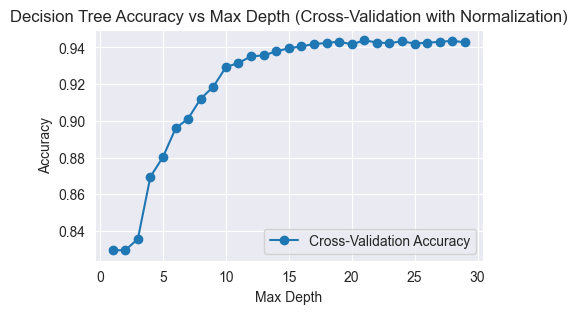

Best max_depth: 21
Best Cross-Validation Accuracy: 0.944
Average Cross-Validation Accuracy: 0.920


In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Define lists to store cross-validated accuracy scores
cv_mean_accuracy = []

# Try max_depth from 1 to 30
depth = range(1, 30)

for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)
    
    # Perform 5-fold cross-validation and calculate mean accuracy on scaled data
    scores = cross_val_score(tree_test, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_mean_accuracy.append(np.mean(scores))

# Plotting cross-validation accuracy for max_depth from 1 to 30
plt.figure(figsize=(5, 3))
plt.plot(depth, cv_mean_accuracy, label="Cross-Validation Accuracy", marker='o')
plt.ylabel("Accuracy")
plt.xlabel("Max Depth")
plt.title("Decision Tree Accuracy vs Max Depth (Cross-Validation with Normalization)")
plt.legend()
plt.grid(True)
plt.show()

# Find the best max_depth and corresponding accuracy
best_index = np.argmax(cv_mean_accuracy)
best_max_depth = depth[best_index]
best_accuracy = cv_mean_accuracy[best_index]

# Calculate the average accuracy across all max_depth values
average_accuracy = np.mean(cv_mean_accuracy)

# Output the best max_depth, corresponding accuracy, and average accuracy
print(f"Best max_depth: {best_max_depth}")
print(f"Best Cross-Validation Accuracy: {best_accuracy:.3f}")
print(f"Average Cross-Validation Accuracy: {average_accuracy:.3f}")


Train Best Model:

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pandas as pd
import time

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the Decision Tree model
tree = DecisionTreeClassifier(max_depth=28)

# Train the model on the full scaled training set
start_train = time.time()
tree.fit(X_train_scaled, y_train)
end_train = time.time()
train_time = end_train - start_train

# Measure prediction time for training data
start_predict_train = time.time()
y_train_tree = tree.predict(X_train_scaled)
end_predict_train = time.time()
predict_train_time = end_predict_train - start_predict_train

# Measure prediction time for test data
start_predict_test = time.time()
y_test_tree = tree.predict(X_test_scaled)
end_predict_test = time.time()
predict_test_time = end_predict_test - start_predict_test

# Output training and prediction times
print(f"Training Time: {train_time:.4f} seconds")
print(f"Prediction Time on Training Data: {predict_train_time:.4f} seconds")
print(f"Prediction Time on Test Data: {predict_test_time:.4f} seconds")

#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))




Training Time: 0.1110 seconds
Prediction Time on Training Data: 0.0030 seconds
Prediction Time on Test Data: 0.0010 seconds
Decision Tree : Accuracy on training Data: 0.993
Decision Tree : Accuracy on test Data: 0.955

Decision Tree : f1_score on training Data: 0.993
Decision Tree : f1_score on test Data: 0.955

Decision Tree : Recall on training Data: 0.991
Decision Tree : Recall on test Data: 0.958

Decision Tree : precision on training Data: 0.996
Decision Tree : precision on test Data: 0.951


In [62]:
# Evaluate the model's performance on the test set
report = classification_report(y_test, y_test_tree, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Drop 'weighted avg' row and 'support' column for clarity
report_df = report_df.drop(['weighted avg'], axis=0)
report_df = report_df.drop(['support'], axis=1)

# Print the classification report
print("Classification Report:")
print(report_df)

Classification Report:
           precision    recall  f1-score
0           0.958146  0.951039  0.954579
1           0.951447  0.958498  0.954959
accuracy    0.954770  0.954770  0.954770
macro avg   0.954797  0.954768  0.954769


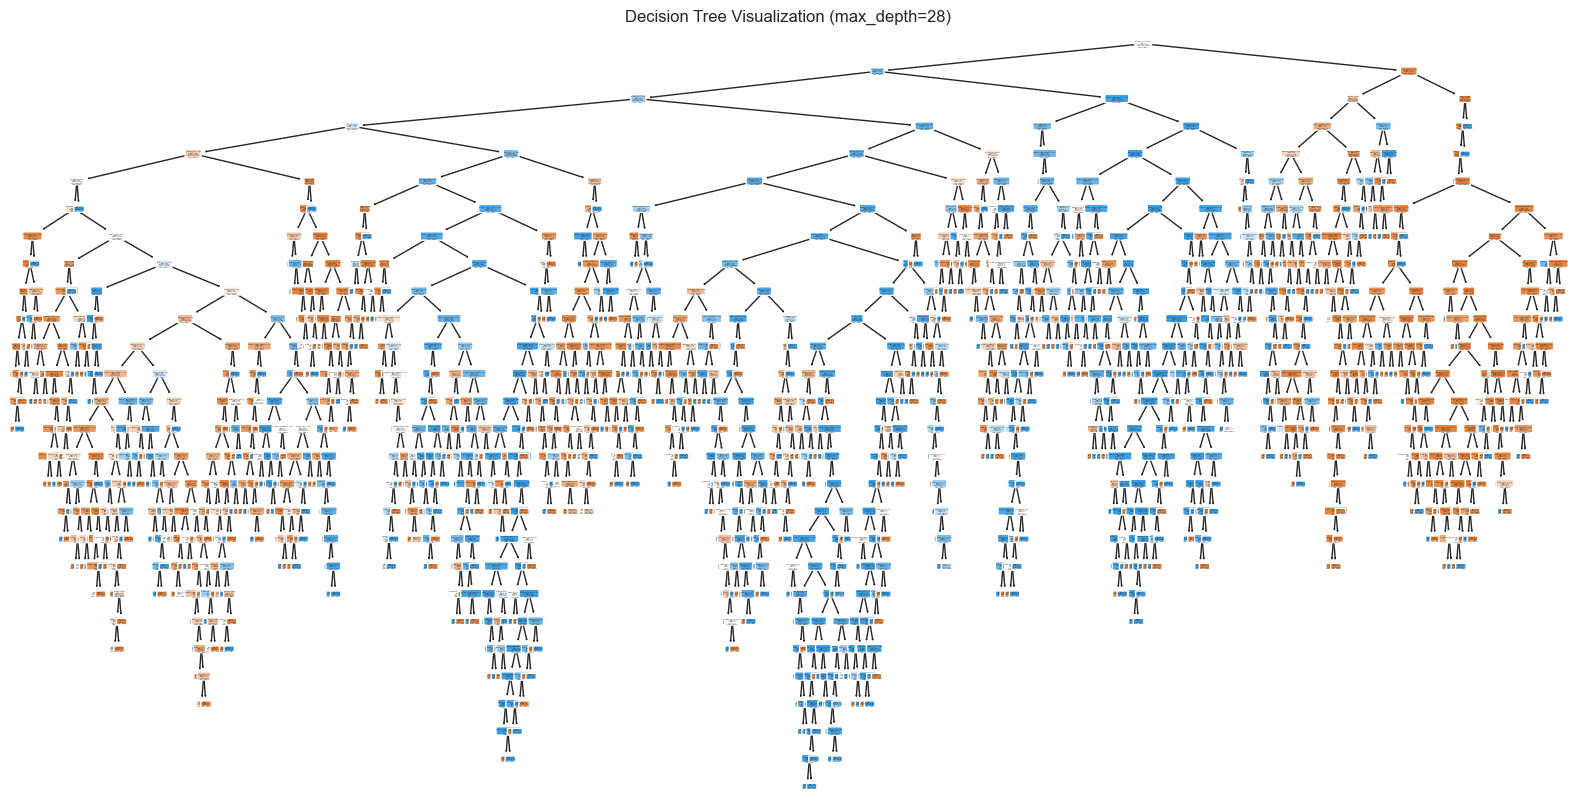

In [49]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train a decision tree classifier with a specific max_depth
tree = DecisionTreeClassifier(max_depth=28)  # Use the best max_depth found previously
tree.fit(X_train_scaled, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))  # Adjust the size as needed
plot_tree(tree, filled=True, feature_names=X_train.columns, class_names=['Class 0', 'Class 1'], rounded=True)
plt.title(f"Decision Tree Visualization (max_depth={28})")
plt.show()


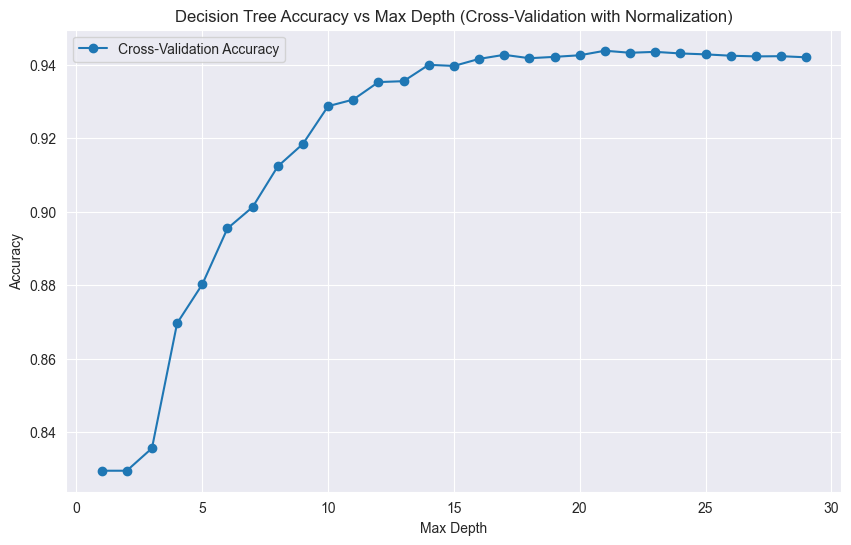

Best max_depth: 21
Best Cross-Validation Accuracy: 0.944


In [64]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree, predict_test_time)

## 5.6. Random Forest : Classifier

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pandas as pd
import time

# Instantiate the model
forest = RandomForestClassifier(n_estimators=22)

# Fit the model
forest.fit(X_train, y_train)

# Measure prediction time for training data
start_predict_train = time.time()
y_train_forest = forest.predict(X_train)
end_predict_train = time.time()
predict_train_time = end_predict_train - start_predict_train

# Measure prediction time for test data
start_predict_test = time.time()
y_test_forest = forest.predict(X_test)
end_predict_test = time.time()
predict_test_time = end_predict_test - start_predict_test

# Output prediction times
print(f"Prediction Time on Training Data: {predict_train_time:.4f} seconds")
print(f"Prediction Time on Test Data: {predict_test_time:.4f} seconds")

Prediction Time on Training Data: 0.0360 seconds
Prediction Time on Test Data: 0.0120 seconds


In [77]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.992
Random Forest : Accuracy on test Data: 0.971

Random Forest : f1_score on training Data: 0.993
Random Forest : f1_score on test Data: 0.971

Random Forest : Recall on training Data: 0.991
Random Forest : Recall on test Data: 0.968

Random Forest : precision on training Data: 0.994
Random Forest : precision on test Data: 0.951


In [78]:
# Evaluate the model's performance on the test set using classification report
report = metrics.classification_report(y_test, y_test_forest, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Drop 'weighted avg' row and 'support' column for clarity
report_df = report_df.drop(['weighted avg'], axis=0)
report_df = report_df.drop(['support'], axis=1)

# Print the classification report
print("Classification Report:")
print(report_df)


Classification Report:
           precision    recall  f1-score
0           0.968535  0.974283  0.971400
1           0.974155  0.968379  0.971259
accuracy    0.971330  0.971330  0.971330
macro avg   0.971345  0.971331  0.971330


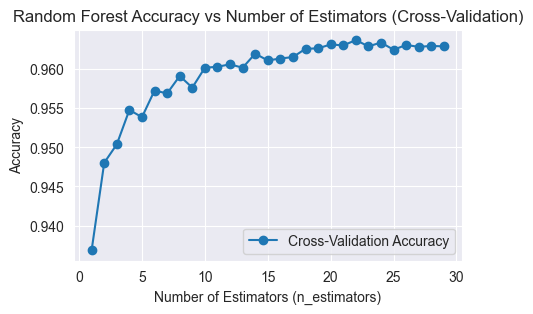

Best n_estimators: 22
Best Cross-Validation Accuracy: 0.964


In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Define lists to store cross-validated accuracy scores
cv_mean_accuracy = []

# Try n_estimators from 1 to 20
n_estimators_range = range(1, 30)

for n in n_estimators_range:
    forest_test = RandomForestClassifier(n_estimators=n, random_state=42)
    
    # Perform 5-fold cross-validation and calculate mean accuracy
    scores = cross_val_score(forest_test, X_train, y_train, cv=5, scoring='accuracy')
    cv_mean_accuracy.append(np.mean(scores))

# Plotting cross-validation accuracy for n_estimators from 1 to 20
plt.figure(figsize=(5, 3))
plt.plot(n_estimators_range, cv_mean_accuracy, label="Cross-Validation Accuracy", marker='o')
plt.ylabel("Accuracy")
plt.xlabel("Number of Estimators (n_estimators)")
plt.title("Random Forest Accuracy vs Number of Estimators (Cross-Validation)")
plt.legend()
plt.grid(True)
plt.show()

# Find the best n_estimators and corresponding accuracy
best_index = np.argmax(cv_mean_accuracy)
best_n_estimators = n_estimators_range[best_index]
best_accuracy = cv_mean_accuracy[best_index]

# Output the best n_estimators and corresponding accuracy
print(f"Best n_estimators: {best_n_estimators}")
print(f"Best Cross-Validation Accuracy: {best_accuracy:.3f}")


In [81]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest, predict_test_time)

## 5.7.Gradient Boosting Classifier
Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting. Boosting algorithms play a crucial role in dealing with bias variance trade-off.  Unlike bagging algorithms, which only controls for high variance in a model, boosting controls both the aspects (bias & variance), and is considered to be more effective. 

In [387]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [388]:
#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [389]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.996
Gradient Boosting Classifier : Accuracy on test Data: 0.962

Gradient Boosting Classifier : f1_score on training Data: 0.996
Gradient Boosting Classifier : f1_score on test Data: 0.958

Gradient Boosting Classifier : Recall on training Data: 0.997
Gradient Boosting Classifier : Recall on test Data: 0.964

Gradient Boosting Classifier : precision on training Data: 0.994
Gradient Boosting Classifier : precision on test Data: 0.951


In [390]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       622
           1       0.95      0.96      0.96       506

    accuracy                           0.96      1128
   macro avg       0.96      0.96      0.96      1128
weighted avg       0.96      0.96      0.96      1128



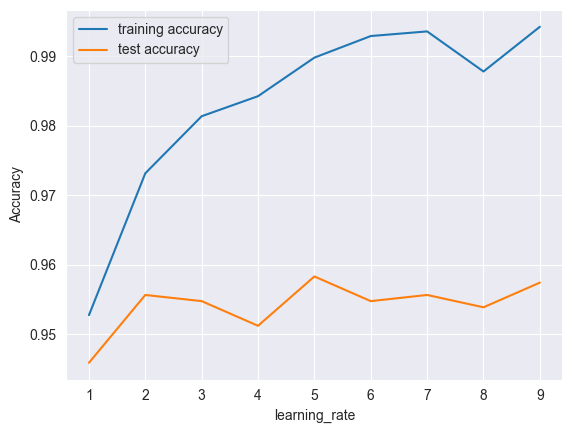

In [391]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

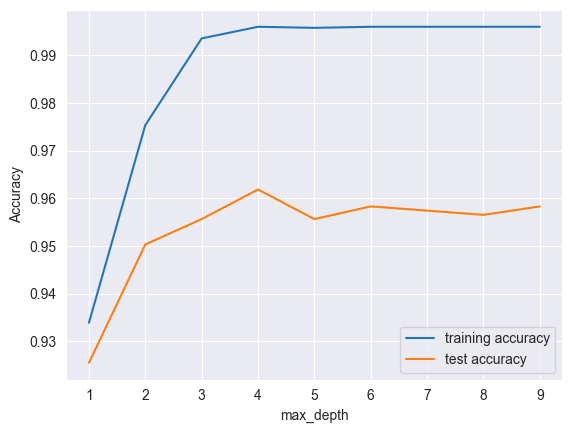

In [392]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10,1)
for n in depth:
    forest_test =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.7)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [393]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

## 5.8. CatBoost Classifier

CatBoost is a recently open-sourced machine learning algorithm from Yandex. It can easily integrate with deep learning frameworks like Google’s TensorFlow and Apple’s Core ML. It can work with diverse data types to help solve a wide range of problems that businesses face today.

In [394]:
#  catboost Classifier Model
from catboost import CatBoostClassifier

# instantiate the model
cat = CatBoostClassifier(learning_rate  = 0.1)

# fit the model 
cat.fit(X_train,y_train)

0:	learn: 0.5729329	total: 2.46ms	remaining: 2.46s
1:	learn: 0.4874567	total: 4.5ms	remaining: 2.25s
2:	learn: 0.4257699	total: 6.53ms	remaining: 2.17s
3:	learn: 0.3823983	total: 8.62ms	remaining: 2.15s
4:	learn: 0.3434108	total: 10.6ms	remaining: 2.12s
5:	learn: 0.3129875	total: 12.8ms	remaining: 2.12s
6:	learn: 0.2920435	total: 15ms	remaining: 2.13s
7:	learn: 0.2713233	total: 17ms	remaining: 2.11s
8:	learn: 0.2540275	total: 19ms	remaining: 2.09s
9:	learn: 0.2416101	total: 21.1ms	remaining: 2.09s
10:	learn: 0.2318337	total: 23ms	remaining: 2.07s
11:	learn: 0.2226322	total: 25.1ms	remaining: 2.07s
12:	learn: 0.2145625	total: 27.1ms	remaining: 2.06s
13:	learn: 0.2087421	total: 29.1ms	remaining: 2.05s
14:	learn: 0.2037056	total: 31.2ms	remaining: 2.05s
15:	learn: 0.1971710	total: 33.2ms	remaining: 2.04s
16:	learn: 0.1924583	total: 35.4ms	remaining: 2.05s
17:	learn: 0.1890183	total: 37.5ms	remaining: 2.04s
18:	learn: 0.1836094	total: 39.4ms	remaining: 2.04s
19:	learn: 0.1793456	total: 41.

In [395]:
#predicting the target value from the model for the samples
y_train_cat = cat.predict(X_train)
y_test_cat = cat.predict(X_test)


In [396]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_cat  = metrics.accuracy_score(y_train,y_train_cat)
acc_test_cat = metrics.accuracy_score(y_test,y_test_cat)
print("CatBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_cat))
print("CatBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_cat))
print()

f1_score_train_cat = metrics.f1_score(y_train,y_train_cat)
f1_score_test_cat = metrics.f1_score(y_test,y_test_cat)
print("CatBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_cat))
print("CatBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_cat))
print()

recall_score_train_cat = metrics.recall_score(y_train,y_train_cat)
recall_score_test_cat = metrics.recall_score(y_test,y_test_cat)
print("CatBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_cat))
print("CatBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_test_cat))
print()

precision_score_train_cat = metrics.precision_score(y_train,y_train_cat)
precision_score_test_cat = metrics.precision_score(y_test,y_test_cat)
print("CatBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_cat))
print("CatBoost Classifier : precision on test Data: {:.3f}".format(precision_score_test_cat))

CatBoost Classifier : Accuracy on training Data: 0.995
CatBoost Classifier : Accuracy on test Data: 0.965

CatBoost Classifier : f1_score on training Data: 0.994
CatBoost Classifier : f1_score on test Data: 0.960

CatBoost Classifier : Recall on training Data: 0.995
CatBoost Classifier : Recall on test Data: 0.958

CatBoost Classifier : precision on training Data: 0.994
CatBoost Classifier : precision on test Data: 0.962


In [397]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_cat))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       622
           1       0.96      0.96      0.96       506

    accuracy                           0.96      1128
   macro avg       0.96      0.96      0.96      1128
weighted avg       0.96      0.96      0.96      1128



In [398]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  CatBoostClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

0:	learn: 0.5729329	total: 2.12ms	remaining: 2.12s
1:	learn: 0.4874567	total: 4ms	remaining: 2s
2:	learn: 0.4257699	total: 5.94ms	remaining: 1.97s
3:	learn: 0.3823983	total: 8.05ms	remaining: 2s
4:	learn: 0.3434108	total: 10ms	remaining: 2s
5:	learn: 0.3129875	total: 12.2ms	remaining: 2.02s
6:	learn: 0.2920435	total: 14.3ms	remaining: 2.02s
7:	learn: 0.2713233	total: 16.2ms	remaining: 2.01s
8:	learn: 0.2540275	total: 18.4ms	remaining: 2.03s
9:	learn: 0.2416101	total: 20.5ms	remaining: 2.03s
10:	learn: 0.2318337	total: 22.5ms	remaining: 2.02s
11:	learn: 0.2226322	total: 24.6ms	remaining: 2.02s
12:	learn: 0.2145625	total: 26.7ms	remaining: 2.03s
13:	learn: 0.2087421	total: 28.8ms	remaining: 2.03s
14:	learn: 0.2037056	total: 30.9ms	remaining: 2.03s
15:	learn: 0.1971710	total: 32.9ms	remaining: 2.02s
16:	learn: 0.1924583	total: 35ms	remaining: 2.02s
17:	learn: 0.1890183	total: 37.2ms	remaining: 2.03s
18:	learn: 0.1836094	total: 39ms	remaining: 2.02s
19:	learn: 0.1793456	total: 40.9ms	remai

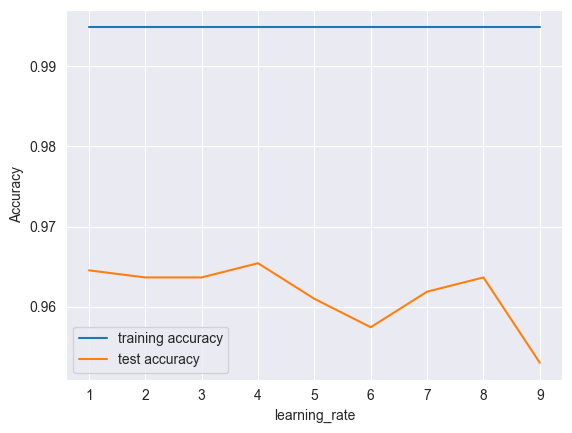

In [399]:

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

In [400]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('CatBoost Classifier',acc_test_cat,f1_score_test_cat,
             recall_score_train_cat,precision_score_train_cat)

## 5.9. XGBoost Classifier

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance that is dominative competitive machine learning. In this post you will discover how you can install and create your first XGBoost model in Python

In [401]:
#  XGBoost Classifier Model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier()

# fit the model 
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [402]:
#predicting the target value from the model for the samples
y_train_xgb = xgb.predict(X_train)
y_test_xgb = xgb.predict(X_test)

In [403]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_xgb = metrics.accuracy_score(y_train,y_train_xgb)
acc_test_xgb = metrics.accuracy_score(y_test,y_test_xgb)
print("XGBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print()

f1_score_train_xgb = metrics.f1_score(y_train,y_train_xgb)
f1_score_test_xgb = metrics.f1_score(y_test,y_test_xgb)
print("XGBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_xgb))
print("XGBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_xgb))
print()

recall_score_train_xgb = metrics.recall_score(y_train,y_train_xgb)
recall_score_test_xgb = metrics.recall_score(y_test,y_test_xgb)
print("XGBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_xgb))
print("XGBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_train_xgb))
print()

precision_score_train_xgb = metrics.precision_score(y_train,y_train_xgb)
precision_score_test_xgb = metrics.precision_score(y_test,y_test_xgb)
print("XGBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_xgb))
print("XGBoost Classifier : precision on test Data: {:.3f}".format(precision_score_train_xgb))

XGBoost Classifier : Accuracy on training Data: 0.992
XGBoost Classifier : Accuracy on test Data: 0.961

XGBoost Classifier : f1_score on training Data: 0.991
XGBoost Classifier : f1_score on test Data: 0.956

XGBoost Classifier : Recall on training Data: 0.990
XGBoost Classifier : Recall on test Data: 0.990

XGBoost Classifier : precision on training Data: 0.992
XGBoost Classifier : precision on test Data: 0.992


In [404]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('XGBoost Classifier',acc_test_xgb,f1_score_test_xgb,
             recall_score_train_xgb,precision_score_train_xgb)

## 6. Comparision of Models
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [405]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [406]:
# dispalying total result
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,K-Nearest Neighbors,0.922,0.916,0.994,0.996
1,Decision Tree,0.957,0.953,0.996,0.995
2,Random Forest,0.961,0.956,0.991,0.994
3,Gradient Boosting Classifier,0.962,0.958,0.997,0.994
4,CatBoost Classifier,0.965,0.960,0.995,0.994
5,XGBoost Classifier,0.961,0.956,0.990,0.992


In [408]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,CatBoost Classifier,0.965,0.960,0.995,0.994
1,Gradient Boosting Classifier,0.962,0.958,0.997,0.994
2,Random Forest,0.961,0.956,0.991,0.994
3,XGBoost Classifier,0.961,0.956,0.990,0.992
4,Decision Tree,0.957,0.953,0.996,0.995
5,K-Nearest Neighbors,0.922,0.916,0.994,0.996


## Storing Best Model

In [409]:
#  XGBoost Classifier Model
from xgboost import XGBClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [413]:
import pickle

# dump information to that file
pickle.dump(gbc, open('model.pkl', 'wb'))

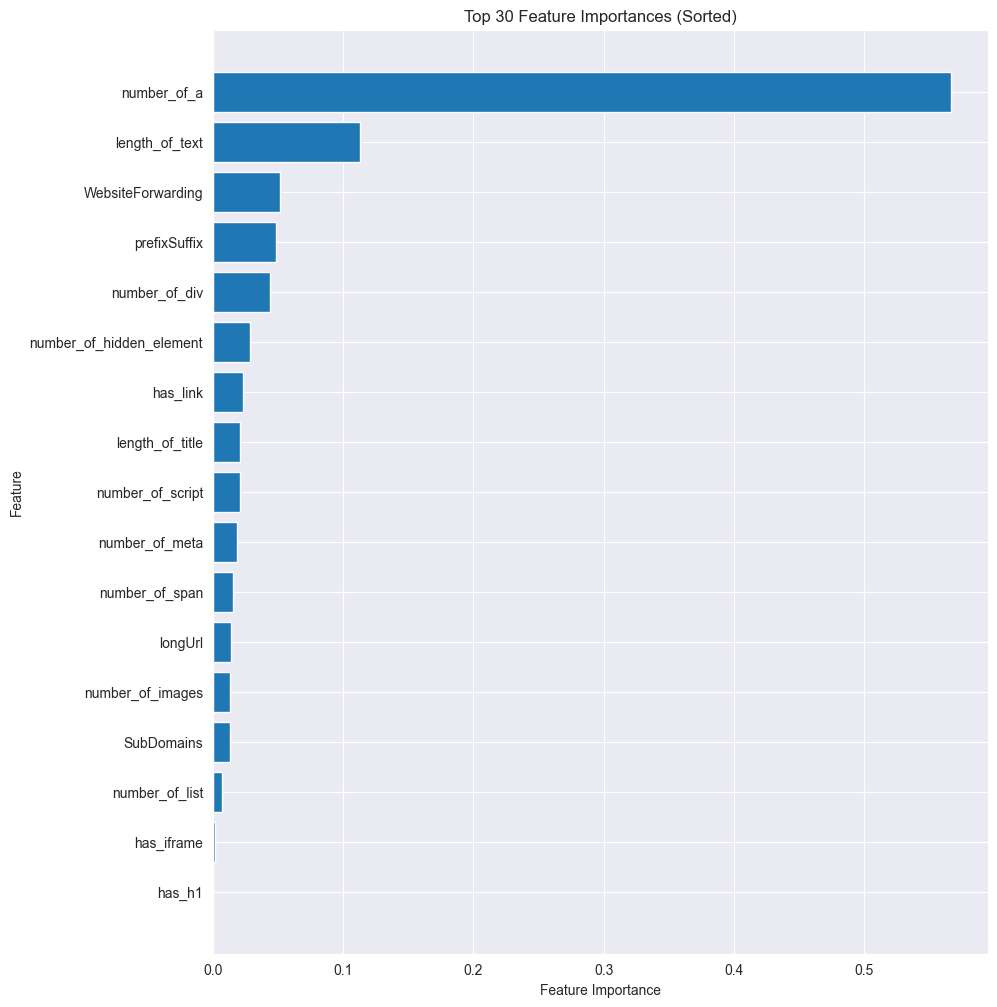

Top 30 Features:
['number_of_a', 'length_of_text', 'WebsiteForwarding', 'prefixSuffix', 'number_of_div', 'number_of_hidden_element', 'has_link', 'length_of_title', 'number_of_script', 'number_of_meta', 'number_of_span', 'longUrl', 'number_of_images', 'SubDomains', 'number_of_list', 'has_iframe', 'has_h1']


In [411]:
# Get feature importance and sort
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': gbc.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Select the top 30 most important features
top_30_features = feature_importance.head(20)

# Plot the top 30 features
plt.figure(figsize=(10, 12))
plt.barh(range(len(top_30_features)), 
         top_30_features['importance'], 
         align='center')
plt.yticks(range(len(top_30_features)), 
           top_30_features['feature'])
plt.title("Top 30 Feature Importances (Sorted)")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

# Print the names of the top 30 features
print("Top 30 Features:")
print(top_30_features['feature'].tolist())


## 7. Conclusion

1. The final take away form this project is to explore various machine learning models, perform Exploratory Data Analysis on phishing dataset and understanding their features. 
2. Creating this notebook helped me to learn a lot about the features affecting the models to detect whether URL is safe or not, also I came to know how to tuned model and how they affect the model performance.
3. The final conclusion on the Phishing dataset is that the some feature like "HTTTPS", "AnchorURL", "WebsiteTraffic" have more importance to classify URL is phishing URL or not. 
4. Gradient Boosting Classifier currectly classify URL upto 97.4% respective classes and hence reduces the chance of malicious attachments.
